In [264]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [265]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [266]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [267]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [268]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_analyse_name = "ALEXIS PEDRÃO_260001087378"
#file_analyse_name = "MÁRCIO MACEDO_260000958767"
file_analyse_name = "ALMEIDA LIMA_260000935642"
#file_analyse_name = "DELEGADO PAULO MARCIO_260001037485"
file_analyse_name = "GEORLIZE_260000835177"
#file_analyse_name = "GILVANI SANTOS_260000935814"
#file_analyse_name = "JURACI NUNES_260000743434"
#file_analyse_name = "LÚCIO FLÁVIO_260000857748"
#file_analyse_name = "RODRIGO VALADARES_260001065879"

## Tf-idf com 0
#file_analyse_name = "EDVALDO_260000983413"
#file_analyse_name = "DELEGADA DANIELLE_260000637328"

#file_analyse_name = "EDVALDO_260000983413"
file_json_contents = file_get_contents("./files_parseds/" + file_analyse_name + ".json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [269]:
stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    #max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)

In [270]:
# Analisar este caso para a exibição dos idfs 0
df = []
top_ten_sentences_per_page = []

for tf in tfIdf:
  frame = pd.DataFrame(tf.T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
  frame = frame.sort_values('TF-IDF', ascending=False)
  top_ten_sentences = frame.head(10)
  top_ten = pd.DataFrame()
  top_ten['Sentence'] = top_ten_sentences.index
  top_ten['TF-IDF'] = top_ten_sentences['TF-IDF'].tolist()
  top_ten_sentences_per_page.append(top_ten)
  df.append(frame)

print(len(top_ten_sentences_per_page))
print(top_ten_sentences_per_page)

40
[       Sentence  TF-IDF
0        acordo     0.0
1         apoio     0.0
2  necessidades     0.0
3        outras     0.0
4      parceria     0.0
5  participação     0.0
6       pessoas     0.0
7         plano     0.0
8      política     0.0
9     políticas     0.0,           Sentence    TF-IDF
0  desenvolvimento  0.461736
1             meio  0.299304
2          emprego  0.299304
3      atendimento  0.286772
4           social  0.275435
5            apoio  0.275435
6        segurança  0.265086
7          governo  0.265086
8            plano  0.255565
9         trabalho  0.246751,        Sentence    TF-IDF
0     município  0.599672
1           lei  0.401249
2        acordo  0.355376
3       governo  0.355376
4         plano  0.342613
5         todos  0.330795
6      processo  0.000000
7        outras  0.000000
8      parceria  0.000000
9  participação  0.000000,     Sentence    TF-IDF
0     cidade  0.604047
1     gestão  0.346110
2    governo  0.290675
3      plano  0.280235
4    públ

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: 

In [271]:
sentences_tfidf_no_zero_dictionary = {}
text_database = []

for df_word in df:
    for sentence, row in df_word.iterrows():
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]

        if row["TF-IDF"] > 0:
            sentences_tfidf_no_zero_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_tfidf_no_zero_dictionary)
#print(text_database)

In [272]:
import json 

file = open("./files_analyseds/tfidf_data/" + file_analyse_name + ".json", 'w')
file.write(json.dumps(text_database))
file.close()

In [273]:
tfIdf.shape

(40, 56)

In [274]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,acordo,0.0
1,apoio,0.0
2,necessidades,0.0
3,outras,0.0
4,parceria,0.0
...,...,...
2235,lei,0.0
2236,meio,0.0
2237,municipais,0.0
2238,apoio,0.0


In [275]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica
best_k_with_score = 5
best_score = 0.3

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  if score > best_score:
    best_score = score
    best_k_with_score = k
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

print("Melhor score: %.4f, então o k deve ser de %i" % (best_score, best_k_with_score))

Para k=2 o valor Silhoutte foi de 0.0863
Para k=3 o valor Silhoutte foi de 0.1094
Para k=4 o valor Silhoutte foi de 0.1013
Para k=5 o valor Silhoutte foi de 0.0930
Para k=6 o valor Silhoutte foi de 0.0998
Para k=7 o valor Silhoutte foi de 0.1325
Para k=8 o valor Silhoutte foi de 0.1563
Para k=9 o valor Silhoutte foi de 0.1705
Melhor score: 0.3000, então o k deve ser de 5


In [276]:
km = KMeans(n_clusters=best_k_with_score,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 4, 3, 1, 3, 3, 1, 1, 0, 2, 1, 1, 0, 0, 4, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 2, 1, 0, 4, 0, 0, 0, 0], dtype=int32)

In [277]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts


,sentence,tf-idf,clusters_km
0,acordo,0.0,0.0
1,apoio,0.0,4.0
2,necessidades,0.0,3.0
3,outras,0.0,1.0
4,parceria,0.0,3.0
...,...,...,...
2235,lei,0.0,NaN
2236,meio,0.0,NaN
2237,municipais,0.0,NaN
2238,apoio,0.0,NaN


In [278]:
pages_in_clusters = {}
for i in range(0, len(clusters_km)):
  page = i + 1
  cluster = clusters_km[i]

  if cluster in pages_in_clusters:
    pages_in_clusters[cluster].append(page)
  else:
    pages_in_clusters[cluster] = [page] 
  

pages_in_clusters = dict(sorted(pages_in_clusters.items()))
pages_in_clusters

{0: [1, 9, 13, 14, 35, 37, 38, 39, 40],
 1: [4, 7, 8, 11, 12, 22, 23, 24, 29, 30, 31, 34],
 2: [10, 16, 17, 18, 19, 20, 21, 33],
 3: [3, 5, 6],
 4: [2, 15, 25, 26, 27, 28, 32, 36]}

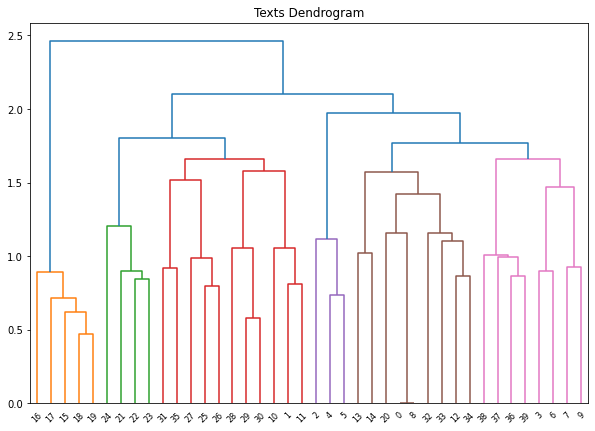

In [279]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)


In [280]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km
0,acordo,0.0,0.0
1,apoio,0.0,4.0
2,necessidades,0.0,3.0
3,outras,0.0,1.0
4,parceria,0.0,3.0
...,...,...,...
2235,lei,0.0,0.0
2236,meio,0.0,0.0
2237,municipais,0.0,0.0
2238,apoio,0.0,0.0


In [281]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[44,  1, 54, 34, 10, 23, 40, 39,  7, 52, 19, 14, 50, 12, 26, 43,
        37, 32, 55,  9, 42, 38, 13, 16,  3, 28,  5, 33, 45, 35, 15, 30,
         4, 25, 27, 22, 17, 20, 36,  6, 24, 11, 46,  0, 47, 21, 31, 29,
         8, 18, 48, 49, 51,  2, 53, 41],
       [18, 10, 17,  6, 55, 53,  7, 39, 21, 43, 14, 37, 51,  8, 47, 42,
        38,  3, 31, 19, 13,  5, 22, 41, 46,  2, 32, 26, 35, 20, 11, 52,
        12, 27, 16,  1, 29, 33, 15, 45,  0, 50, 25, 30, 48, 44, 34, 36,
        49,  9, 54, 23,  4, 28, 40, 24],
       [48,  4, 47,  2, 39, 29, 28, 36, 52, 30, 21, 32, 16,  9,  1,  3,
        51, 20, 34, 54, 44, 40, 18,  8, 41, 33, 24, 42, 31, 53,  7, 22,
        23,  0, 27, 46,  5, 15, 35,  6, 25, 10, 12, 11, 26, 49, 55, 14,
        38, 43, 37, 17, 13, 19, 45, 50],
       [ 0, 29, 54, 24, 22, 35, 45, 20, 42, 39, 21, 17, 16, 14, 19, 15,
        18, 12, 13, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 23, 55,
        25, 26, 53, 52, 51, 50, 49, 48, 47, 46, 44, 43, 41, 40, 38, 37,
        36, 3

In [282]:
# Criação de uma variável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [283]:
terms

array(['acordo', 'apoio', 'assistência', 'atendimento', 'atenção',
       'através', 'ações', 'bem', 'básica', 'capital', 'cidade',
       'considerando', 'criar', 'criação', 'dados', 'demanda',
       'desenvolver', 'desenvolvimento', 'educação', 'emprego', 'forma',
       'gestão', 'governo', 'integração', 'lei', 'meio', 'melhoria',
       'municipais', 'municipal', 'município', 'necessidades', 'outras',
       'parceria', 'participação', 'pessoas', 'plano', 'política',
       'políticas', 'políticas públicas', 'população', 'processo',
       'programa', 'pública', 'públicas', 'público', 'públicos',
       'realizar', 'rede', 'saúde', 'secretaria', 'segurança', 'serviços',
       'sistema', 'social', 'todos', 'trabalho'], dtype=object)

In [284]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(best_k_with_score):
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  pages = [str(page) for page in pages_in_clusters[i]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms), 'pages': pages})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words,pages
0,0,"público, apoio, todos, pessoas, cidade, integr...","[1, 9, 13, 14, 35, 37, 38, 39, 40]"
1,1,"educação, cidade, desenvolvimento, ações, trab...","[4, 7, 8, 11, 12, 22, 23, 24, 29, 30, 31, 34]"
2,2,"saúde, atenção, rede, assistência, população, ...","[10, 16, 17, 18, 19, 20, 21, 33]"
3,3,"acordo, município, todos, lei, governo, plano,...","[3, 5, 6]"
4,4,"municipal, segurança, meio, secretaria, públic...","[2, 15, 25, 26, 27, 28, 32, 36]"


In [285]:
import json 

results_saves = []

for cluster_data in centroids:
  words = cluster_data['words']
  pages = cluster_data['pages']
  content = {'keywords': words, 'pages_relationeds': pages, 'data': []}

  for page_number in pages:
    page_index = int(page_number) - 1
    content['data'].append(content_pages[page_index])
  
  results_saves.append(content)


file = open("./files_analyseds/" + file_analyse_name + ".json", 'w')
file.write(json.dumps(results_saves))
file.close()

In [286]:
for n in range(best_k_with_score):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['público, apoio, todos, pessoas, cidade, integração, processo, população, bem, sistema']
sentence: acordo
sentence: política
sentence: processo
sentence: programa
sentence: através
sentence: bem
sentence: básica
sentence: capital
sentence: cidade
sentence: considerando

Cluster 1: ['educação, cidade, desenvolvimento, ações, trabalho, social, bem, população, gestão, públicas']
sentence: outras
sentence: pessoas
sentence: plano
sentence: políticas públicas
sentence: população
sentence: secretaria
sentence: segurança
sentence: serviços
sentence: municipal
sentence: municipais

Cluster 2: ['saúde, atenção, rede, assistência, população, município, municipal, política, sistema, necessidades']
sentence: políticas
sentence: públicas
sentence: público
sentence: públicos
sentence: realizar
sentence: rede
sentence: saúde
sentence: atendimento

Cluster 3: ['acordo, município, todos, lei, governo, plano, públicos, forma, pública, população']
sentence: necessidades
sentence: parceria
sen

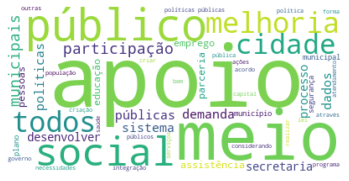

In [287]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if len(sentences_tfidf_no_zero_dictionary) > 0:
  words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_tfidf_no_zero_dictionary)

  plt.imshow(words_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
else:
  print("Sem palavras com TF-IDF diferente de zero")

In [288]:
#### Testes com clusters hierarquicos
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([2, 0, 4, 5, 4, 4, 5, 5, 2, 5, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 6, 6, 6, 6])

In [289]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acordo,0.0,0.0,2.0
1,apoio,0.0,4.0,0.0
2,necessidades,0.0,3.0,4.0
3,outras,0.0,1.0,5.0
4,parceria,0.0,3.0,4.0
...,...,...,...,...
2235,lei,0.0,0.0,NaN
2236,meio,0.0,0.0,NaN
2237,municipais,0.0,0.0,NaN
2238,apoio,0.0,0.0,NaN


In [290]:
import collections

top_words_by_plan = []
count = 0

for row in tfIdf.toarray():
  a = row
  b = tfIdfVectorizer.get_feature_names_out()

  dict_words = dict(zip(b, a))
  sorted_dict = sorted(dict_words.items(), key=lambda x: x[1], reverse=True)
  
  top_words_by_plan.append({'words': [w[0] for w in sorted_dict[:5]]})
  count += 1

In [291]:
# best_k_with_score define o número de clusters usados para treinar o cluster hierárquico
for i in range(best_k_with_score):
  all_cluster_i = dataframe_texts[dataframe_texts['cluster_agg']==i]
  print(i)
  print(all_cluster_i.index)
  all_plans_index = list(all_cluster_i.index)
  #cluster_words = [w for m in all_plans_index for w in top_words_by_plan[m]['words']]
  #word_count = sorted(dict(collections.Counter(cluster_words)).items(), key=lambda x: x[1], reverse=True)
  #print("Cluster %i: %s" % (i, [word[0] for word in word_count[:5]]))

  for index, row in all_cluster_i.head(10).iterrows():
    print("\tSentença: %s" % row['sentence'])
  print()
  

0
Int64Index([1, 10, 11, 25, 26, 27, 28, 29, 30, 31, 35], dtype='int64')
	Sentença: apoio
	Sentença: políticas públicas
	Sentença: população
	Sentença: social
	Sentença: todos
	Sentença: município
	Sentença: municipal
	Sentença: municipais
	Sentença: criação
	Sentença: assistência

1
Int64Index([21, 22, 23, 24], dtype='int64')
	Sentença: secretaria
	Sentença: segurança
	Sentença: serviços
	Sentença: sistema

2
Int64Index([0, 8, 12, 13, 14, 20, 32, 33, 34], dtype='int64')
	Sentença: acordo
	Sentença: política
	Sentença: processo
	Sentença: programa
	Sentença: pública
	Sentença: saúde
	Sentença: atendimento
	Sentença: atenção
	Sentença: através

3
Int64Index([15, 16, 17, 18, 19], dtype='int64')
	Sentença: públicas
	Sentença: público
	Sentença: públicos
	Sentença: realizar
	Sentença: rede

4
Int64Index([2, 4, 5], dtype='int64')
	Sentença: necessidades
	Sentença: parceria
	Sentença: participação

